In [1]:
%load_ext autoreload

# ODE

## Ejercicio 1
$y'= -5y+5t^2+2t$
* $0 \le t \le 1$
* $y(t_0)=1/3$
* $N=10$



In [2]:
%autoreload 2
from src import ODE_euler


[02-06 13:47:11][INFO] 2025-02-06 13:47:11.279915
[02-06 13:47:11][INFO] User| 2025-02-06 13:47:11.350595
[02-06 13:47:11][INFO] 2025-02-06 13:47:11.352005
[02-06 13:47:11][INFO] User| 2025-02-06 13:47:11.353237


## Comparación con la solución real
La solución real de la ecuación diferencial es:
$y(t)=t^2 +1/3e^{-5t}$

* Grafique la solución real y la aproximación obtenida con el método de Euler en una misma gráfica.



In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(t: float, y: float) -> float:
    return -5 * y + 5 * t**2 + 2 * t

def y_exacta(t):
    return t**2 + (1/3)*np.exp(-5*t)

def f(t: float, y: float) -> float:
    return -5 * y + 5 * t**2 + 2 * t

a = 0  
b = 1 
y_t0 = 1 / 3  
N = 10 

ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)

print("Valores aproximados de y:", ys)
print("Puntos de tiempo t:", ts)
print("Tamaño del paso h:", h)


Valores aproximados de y: [0.3333333333333333, 0.16666666666666666, 0.10833333333333334, 0.11416666666666667, 0.16208333333333336, 0.2410416666666667, 0.34552083333333333, 0.4727604166666667, 0.6213802083333333, 0.7906901041666666, 0.9803450520833332]
Puntos de tiempo t: [0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]
Tamaño del paso h: 0.1


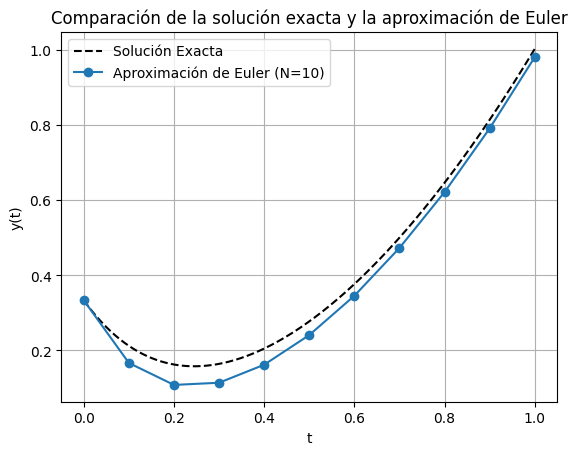

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def y_exacta(t: float) -> float:
    return t**2 + (1/3) * np.exp(-5 * t)

t_exacta = np.linspace(a, b, 1000)
y_exacta_values = y_exacta(t_exacta)

plt.plot(t_exacta, y_exacta_values, label="Solución Exacta", color='black', linestyle='--')
plt.plot(ts, ys, label="Aproximación de Euler (N=10)", marker='o')

plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Comparación de la solución exacta y la aproximación de Euler")
plt.legend()
plt.grid(True)
plt.show()


# Errores
Calcule el eeror relativo para diferentes valores de N.

In [6]:
def error_relativo(y_exacta_values, ys):
    return np.abs((np.array(y_exacta_values) - np.array(ys)) / np.array(y_exacta_values))

def calcular_error(N):
    ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)
    
    y_exacta_values = [y_exacta(t) for t in ts]

    error = error_relativo(y_exacta_values, ys)

    avg_error = np.mean(error)
    return avg_error

error_N5 = calcular_error(5)
error_N10 = calcular_error(10)
error_N20 = calcular_error(20)

print(f"Error N=5: {error_N5:.5e}")
print(f"Error N=10: {error_N10:.5e}")
print(f"Error N=20: {error_N20:.5e}")


Error N=5: 2.79791e-01
Error N=10: 1.29095e-01
Error N=20: 6.31457e-02
